In [7]:
import nibabel as nib
from skimage.metrics import structural_similarity as ssim
import numpy as np
import random
import matplotlib.pyplot as plt
import os

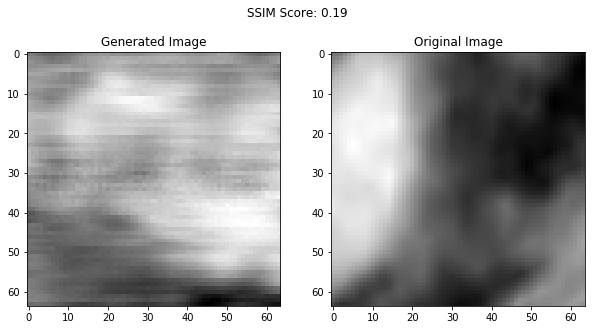

In [27]:
# gives random slices and its ssim
image1 = nib.load('Output/2.nii').get_fdata()
image2 = nib.load('Test/2.nii').get_fdata()

# Get the shape of the images
z, y, x = image1.shape

# Randomly select a slice index
slice_idx = random.randint(0, z-1)

# Extract the 2D slices from both images
slice1 = image1[slice_idx, :, :]
slice2 = image2[slice_idx, :, :]

# Compute the SSIM score
score = ssim(slice1, slice2, data_range=slice2.max() - slice2.min())

# Plot the two slices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(slice1, cmap='gray')
ax1.set_title('Generated Image')
ax2.imshow(slice2, cmap='gray')
ax2.set_title('Original Image')
fig.suptitle('SSIM Score: {:.2f}'.format(score))

# Show the plot
plt.show()

In [6]:
import os
ssim_scores = []

# Loop over each slice in the 3D images
for i in range(image1.shape[2]):
    # Select a slice from each image
    slice1 = image1[:, :, i]
    slice2 = image2[:, :, i]
    
    # Calculate the SSIM score for the current slice
    score = ssim(slice1, slice2, data_range=slice2.max() - slice2.min())
    
    # Add the SSIM score to the list
    ssim_scores.append(score)

# Calculate the average SSIM score across all slices
avg_ssim = np.mean(ssim_scores)

print(f'Average SSIM score: {avg_ssim:.4f}')

Average SSIM score: 0.1854


In [8]:
# outputs the average ssim of all 3d images
output_path = "Output/"
test_path = "Test/"

# Loop over each image in the test and output files
for i in range(8):
    # Load the images from file
    output_img = nib.load(os.path.join(output_path, f"{i}.nii")).get_fdata()
    test_img = nib.load(os.path.join(test_path, f"{i}.nii")).get_fdata()
    
    ssim_scores = []
    
    # Loop over each slice in the 3D images
    for j in range(output_img.shape[2]):
        # Select a slice from each image
        slice1 = output_img[:, :, j]
        slice2 = test_img[:, :, j]
        
        # Calculate the SSIM score for the current slice
        score = ssim(slice1, slice2, data_range=slice2.max() - slice2.min())
        
        # Add the SSIM score to the list
        ssim_scores.append(score)
    
    # Calculate the average SSIM score across all slices
    avg_ssim = np.mean(ssim_scores)
    
    print(f'Average SSIM score for image {i}: {avg_ssim:.4f}')

Average SSIM score for image 0: 0.0000
Average SSIM score for image 1: -0.0005
Average SSIM score for image 2: 0.1854
Average SSIM score for image 3: 0.0505
Average SSIM score for image 4: 0.2808
Average SSIM score for image 5: 0.4072
Average SSIM score for image 6: 0.2640
Average SSIM score for image 7: 0.2772


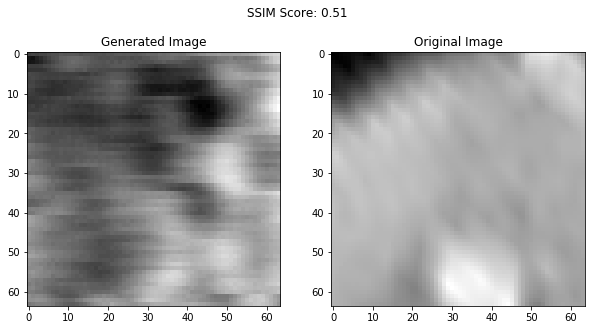

In [32]:
# outputd the slices with max ssim score
image1 = nib.load('Output/7.nii').get_fdata()
image2 = nib.load('Test/7.nii').get_fdata()

# Initialize variables
max_score = -1
max_slice1 = None
max_slice2 = None

# Loop over each slice in the 3D images
for z in range(image1.shape[0]):
    # Extract the 2D slices from both images
    slice1 = image1[z, :, :]
    slice2 = image2[z, :, :]

    # Compute the SSIM score
    score = ssim(slice1, slice2, data_range=slice2.max() - slice2.min())

    # Check if the current score is the maximum so far
    if score > max_score:
        max_score = score
        max_slice1 = slice1
        max_slice2 = slice2

# Plot the two slices with the maximum SSIM score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(max_slice1, cmap='gray')
ax1.set_title('Generated Image')
ax2.imshow(max_slice2, cmap='gray')
ax2.set_title('Original Image')
fig.suptitle('SSIM Score: {:.2f}'.format(max_score))

# Show the plot
plt.show()